# Credit Card Fraud Detection
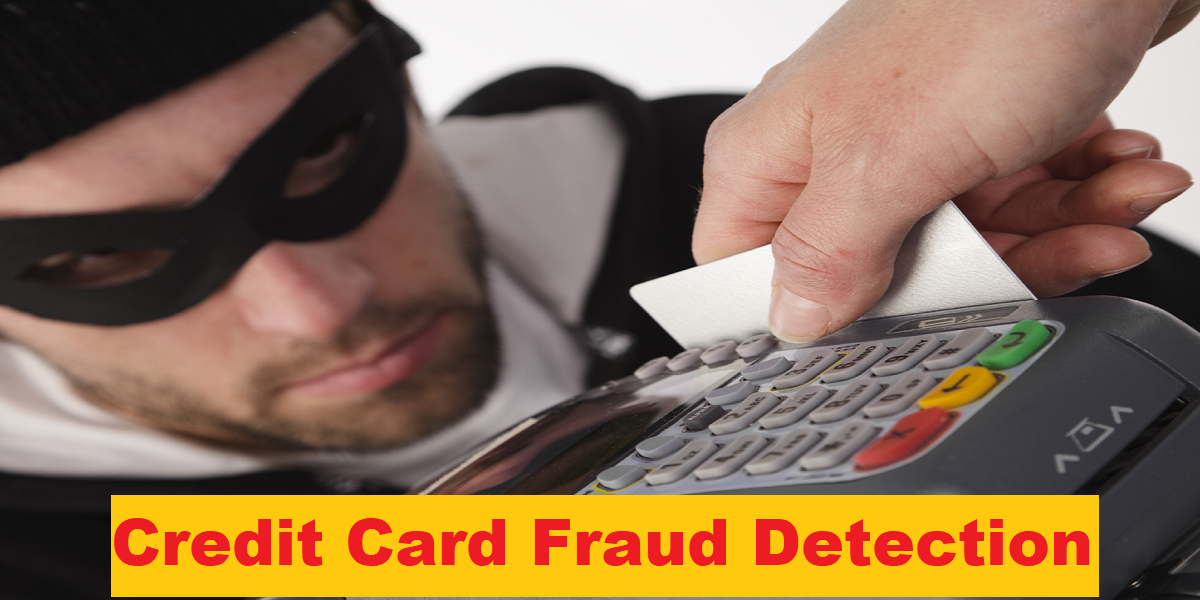

## Problem Statement
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content** -The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
- Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Dataset link : https://drive.google.com/file/d/11mgAuVTDWxkGFBqzZOeod22rUjbEL4dQ/view?usp=sharing

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
pd.options.display.max_columns=50
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Information

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.size

8829017

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Missing values

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### All columns are PC's except Time, Class and Amount, Explore these columns

## Data Exploration

### Distribution of time

<AxesSubplot:xlabel='Time', ylabel='Density'>

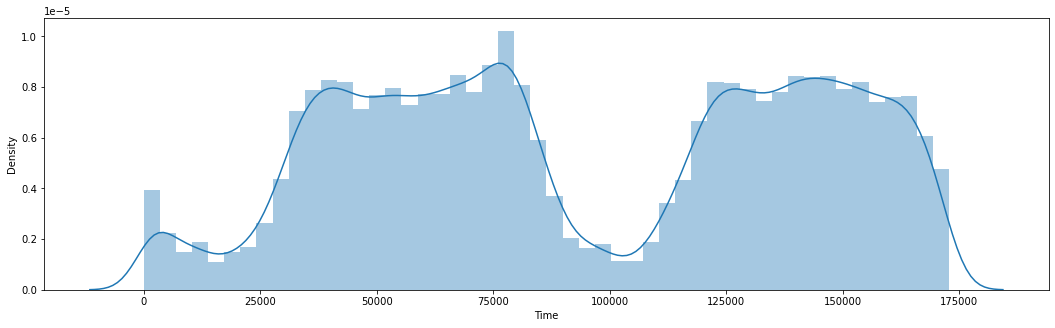

In [ ]:
#Time elapsed between currenct transaction and first transaction
plt.figure(figsize=(18,5))
sns.distplot(df['Time'])

#### Data is of two days hence we see daily seasonality here, Transaction are more in mid phase of the day.

### Distribution of Amount column

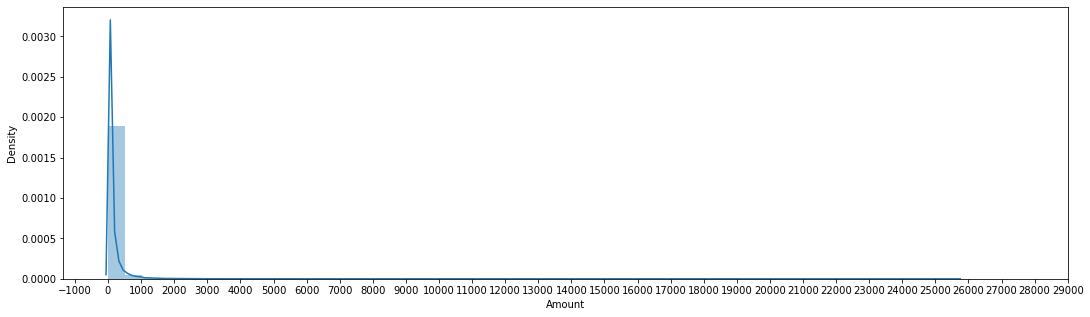

In [ ]:
#Amount column
plt.figure(figsize=(18,5))
sns.distplot(df['Amount'])
plt.xticks(np.arange(-1000, 30000, 1000));

#### As we can see from above distribution most of the transaction amount are between 0 to 1000.

### Count of Class column

In [ ]:
cls=df.Class.value_counts()
cls

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
fig=px.pie(cls, values=cls.values, names=cls.index,
          labels=None, hole=0.4,
          title="Count of Class 1-Fraud, 0-Non-Fraud")
fig.show()

![newplot.png](attachment:newplot.png)

#### 99.8% entries belongs to Non-fraud and only 0.173% belongs to Fraud... Data is highly imbalanced.

### Transaction Amount by hour & Class

#### We have 2 days data so create Hour column so we can analyse Transcation by hour

In [ ]:
dd=df[['Time','Class','Amount']]
dd['Hour'] = np.floor(dd['Time']/3600)
dd['Hour']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
284802    47.0
284803    47.0
284804    47.0
284805    47.0
284806    47.0
Name: Hour, Length: 284807, dtype: float64

### Statistical Information about Transactions

In [ ]:
stats=dd.groupby(['Hour', 'Class'])['Amount'].aggregate(['count', 'sum', 'mean'])
stats.reset_index(inplace=True)
stats.head()

,Hour,Class,count,sum,mean
0,0.0,0,3961,256572.87,64.774772
1,0.0,1,2,529.00,264.500000
2,1.0,0,2215,145806.76,65.826980
3,1.0,1,2,298.93,149.465000
4,2.0,0,1555,106989.39,68.803466


In [ ]:
# creating different dataframe for each class
non_fraud = stats[stats['Class'] == 0]
fraud = stats[stats['Class'] == 1]

### Transaction Amount in Hour

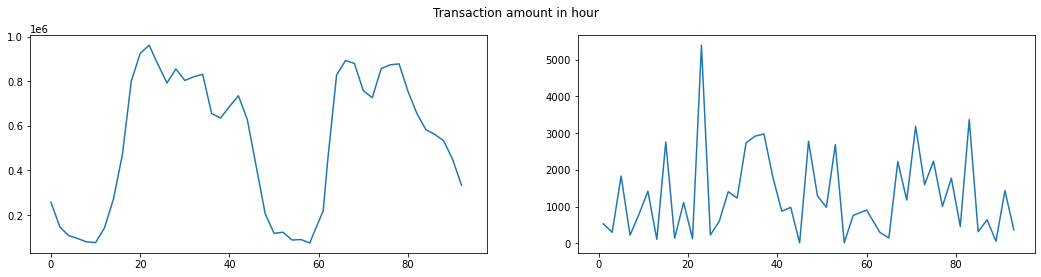

In [ ]:
fig,ax= plt.subplots(1,2, sharex=True, figsize=(18,4))
ax[0].plot(non_fraud['sum'])
ax[1].plot(fraud['sum'])
plt.suptitle("Transaction amount in hour");

### Number of transaction in hour

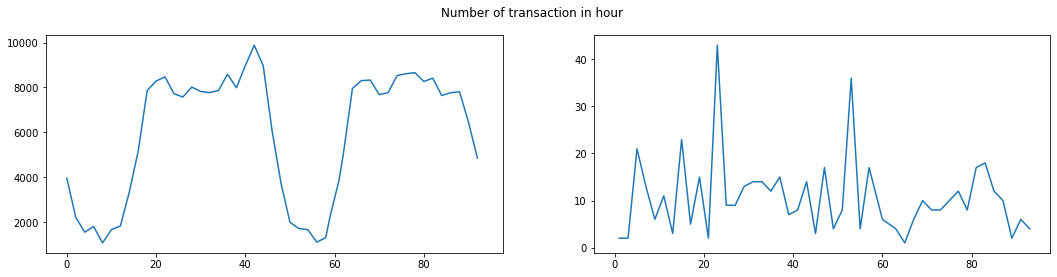

In [ ]:
fig,ax= plt.subplots(1,2, sharex=True, figsize=(18,4))
ax[0].plot(non_fraud['count'])
ax[1].plot(fraud['count'])
plt.suptitle("Number of transaction in hour");

### Average transaction amount in hour

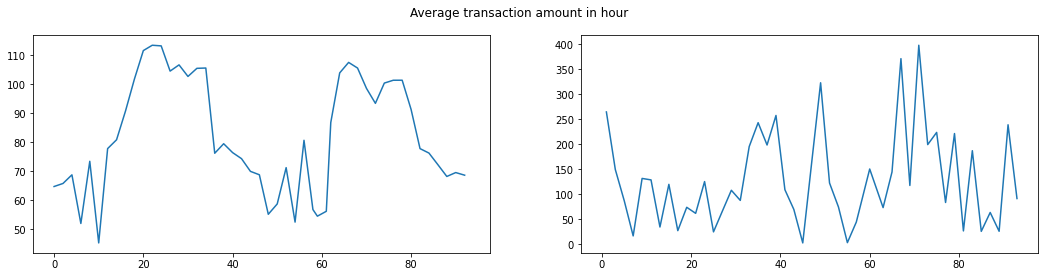

In [ ]:
fig,ax= plt.subplots(1,2, sharex=True, figsize=(18,4))
ax[0].plot(non_fraud['mean'])
ax[1].plot(fraud['mean'])
plt.suptitle("Average transaction amount in hour");

#### In fraud Transaction the average transaction amount is very high as compare to non-fraud average transaction amount.

### Correlation matrix

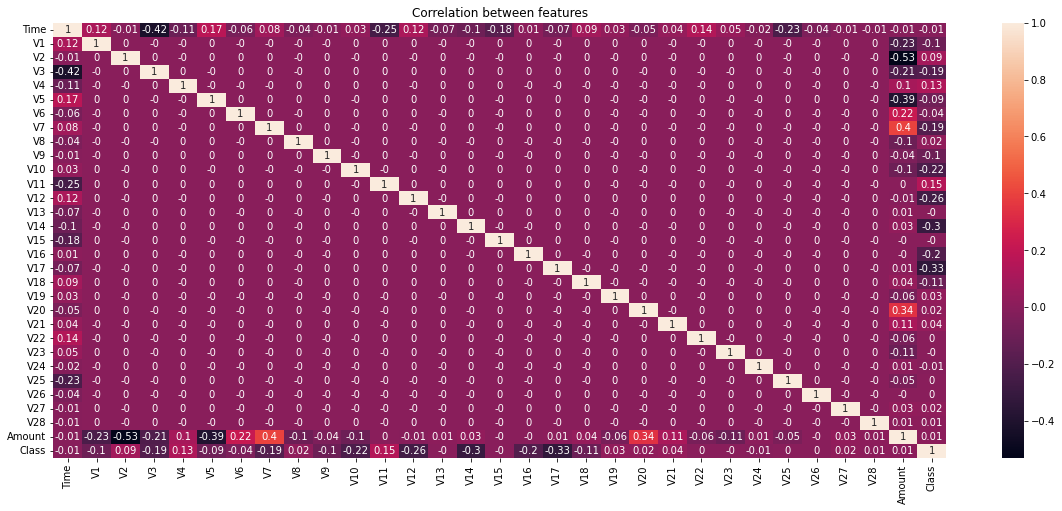

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr().round(2), annot=True)
plt.title("Correlation between features");

## Feature Selection using correlation

**There are some feature with Corration almost Zero, hence these features have not any significant impact on target varible, hence remove these features ans select those which have more significant impact on target variable.**

#### Here the features are PCA components hence we dont know whether these features are Continous or categorical, Hence we will use both correlation (for Continous) and ANOVA test (for categorical varible) to slect the features.

In [ ]:
correlation=df.corr()
correlation['Class'][abs(correlation['Class']) > 0.05 ]

V1      -0.101347
V2       0.091289
V3      -0.192961
V4       0.133447
V5      -0.094974
V7      -0.187257
V9      -0.097733
V10     -0.216883
V11      0.154876
V12     -0.260593
V14     -0.302544
V16     -0.196539
V17     -0.326481
V18     -0.111485
Class    1.000000
Name: Class, dtype: float64

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(data, TargetVariable, CatCols):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('ANOVA Results\n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=data.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)


CatCols=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                          'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19','V20',
                          'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']
FunctionAnova(data=df, 
              TargetVariable='Class', 
              CatCols=CatCols)

ANOVA Results

Time is correlated with Class | P-Value: 0.0
V1 is correlated with Class | P-Value: 0.0
V2 is correlated with Class | P-Value: 0.0
V3 is correlated with Class | P-Value: 0.0
V4 is correlated with Class | P-Value: 0.0
V5 is correlated with Class | P-Value: 0.0
V6 is correlated with Class | P-Value: 0.0
V7 is correlated with Class | P-Value: 0.0
V8 is correlated with Class | P-Value: 0.0
V9 is correlated with Class | P-Value: 0.0
V10 is correlated with Class | P-Value: 0.0
V11 is correlated with Class | P-Value: 0.0
V12 is correlated with Class | P-Value: 0.0
V13 is correlated with Class | P-Value: 0.0
V14 is correlated with Class | P-Value: 0.0
V15 is correlated with Class | P-Value: 0.0
V16 is correlated with Class | P-Value: 0.0
V17 is correlated with Class | P-Value: 0.0
V18 is correlated with Class | P-Value: 0.0
V19 is correlated with Class | P-Value: 0.0
V20 is correlated with Class | P-Value: 0.0
V21 is correlated with Class | P-Value: 0.0
V22 is correlated with Cl

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

#### All the columns are selected.

## Classification Model

### Split data into output or target and input features

In [ ]:
X=df.drop('Class', axis=1).values
y=df['Class'].values

### Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)
print("X train shape", x_train.shape)
print("X test shape", x_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

X train shape (227845, 30)
X test shape (56962, 30)
y train shape (227845,)
y test shape (56962,)


### Creating a function to train and evaluate the each classification model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
models = {
    "LR": LogisticRegression(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()
}

In [ ]:
for name, model in models.items():
    print('Training Model:', name)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Training Accuracy:', (accuracy_score(y_train, model.predict(x_train))).round(2))
    print('Testing Accuracy:', (accuracy_score(y_test, y_pred)).round(2))
    print('ROC-AUC:', (roc_auc_score(y_test, y_pred).round(2)))
    print('*-*'*30)

Training Model: LR
Training Accuracy: 1.0
Testing Accuracy: 1.0
ROC-AUC: 0.84
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model: DT
Training Accuracy: 1.0
Testing Accuracy: 1.0
ROC-AUC: 0.89
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model: RF
Training Accuracy: 1.0
Testing Accuracy: 1.0
ROC-AUC: 0.9
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model: XGB
Training Accuracy: 1.0
Testing Accuracy: 1.0
ROC-AUC: 0.92
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model: Naive Bayes
Training Accuracy: 0.99
Testing Accuracy: 0.99
ROC-AUC: 0.8
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model: SVC
Training Accuracy: 1.0
Testing Accuracy: 1.0
ROC-AUC: 0.5
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**

#### ROC-AUC score for XG Boost model is high ie. 92%. Hence choose this model to predict whether transaction is fraud or not.

In [ ]:
xgb=XGBClassifier()
xgb_fit=xgb.fit(x_train,y_train)
y_pred=xgb_fit.predict(x_test)
roc_auc_score(y_test, y_pred).round(4)

0.9158

### Plot ROC curve

<Figure size 1440x360 with 0 Axes>

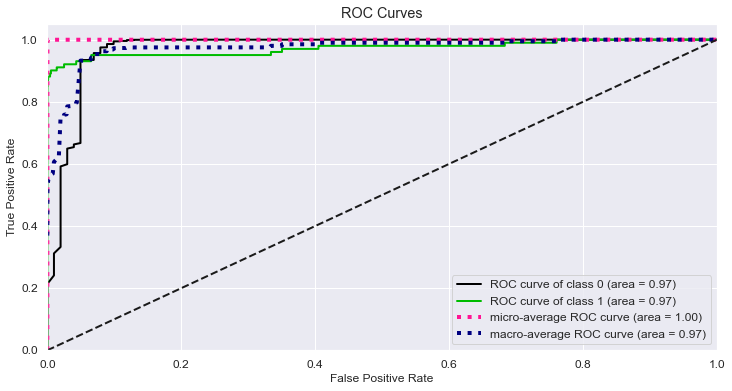

In [ ]:
import scikitplot as skplt
sns.set(rc={'figure.figsize':(12,6)})
plt.figure(figsize=(20,5))
y_prob= xgb.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test, y_prob);

### Plot confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))
print("Out of {}, {} are missclassified.".format(y_test.shape[0], sum(y_test!=y_pred)))

[[56855     6]
 [   17    84]]
Out of 56962, 23 are missclassified.


## We are dealing with imbalanced data, lets use some of Resampling techniques and then compare the results.

### 1. Random Under-Sampling
- Removing random samples from majority class

In [ ]:
#count of each class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#creating 2 datframe for each class
class_0=df[df['Class']==0]
class_1=df[df['Class']==1]

#creating random sample of equal count
class_0_under = class_0.sample(492)

under_sampling= pd.concat([class_0_under, class_1], axis=0)
under_sampling['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

#### Now run the XGboost model and evaluate the model

In [ ]:
#create input and output features
X=under_sampling.drop('Class', axis=1).values
y=under_sampling['Class'].values

#train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

#train the model
xgb=XGBClassifier()
xgb_fit=xgb.fit(x_train,y_train)
y_pred=xgb_fit.predict(x_test)

#print the score
print("AUC-ROC score", roc_auc_score(y_test, y_pred).round(4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nOut of {}, {} are missclassified.".format(y_test.shape[0], sum(y_test!=y_pred)))

AUC-ROC score 0.9513

Confusion Matrix:
 [[89  2]
 [ 8 98]]

Out of 197, 10 are missclassified.


#### AUC-ROC score is increased from 92 to 95% in case of undersampling and missclassified values are also reduced.

### 2.  Random Over-Sampling
- Adding more copies to minority class

In [ ]:
#count of each class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#creating copies of minority class
class_1_over = class_1.sample(284315, replace=True)

#concatanating both class
over_sampling = pd.concat([class_1_over, class_0], axis=0)
over_sampling['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [ ]:
#create input and output features
X=over_sampling.drop('Class', axis=1).values
y=over_sampling['Class'].values

#train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

#train the model
xgb=XGBClassifier()
xgb_fit=xgb.fit(x_train,y_train)
y_pred=xgb_fit.predict(x_test)

#print the score
print("AUC-ROC score", roc_auc_score(y_test, y_pred).round(4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nOut of {}, {} are missclassified.".format(y_test.shape[0], sum(y_test!=y_pred)))

AUC-ROC score 0.9999

Confusion Matrix:
 [[57003    10]
 [    0 56713]]

Out of 113726, 10 are missclassified.


#### AUC-ROC score is 99.99 and it has missclassified only the Fraud class as non-fraud.

### 4. Under-sampling: Tomek links
- Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes.
#### Method-: Instance hardness threshold
- InstanceHardnessThreshold is a specific algorithm in which a classifier is trained on the data and the samples with lower probabilities are removed

In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold

X=df.drop('Class', axis=1).values
y=df['Class'].values

lr=InstanceHardnessThreshold(random_state=0,
                             estimator=LogisticRegression(
                                 solver='lbfgs', multi_class='auto'))
x_resampled, y_resampled = lr.fit_resample(X, y)
print(x_resampled.shape, y_resampled.shape)

(985, 30) (985,)


In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2, random_state=0)

#train the model
xgb=XGBClassifier()
xgb_fit=xgb.fit(x_train,y_train)
y_pred=xgb_fit.predict(x_test)

#print the score
print("AUC-ROC score", roc_auc_score(y_test, y_pred).round(4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nOut of {}, {} are missclassified.".format(y_test.shape[0], sum(y_test!=y_pred)))

AUC-ROC score 0.9945

Confusion Matrix:
 [[ 90   1]
 [  0 106]]

Out of 197, 1 are missclassified.


#### AUC-ROC score is 99.45 and only 1 missclassified value.

### 5. Naive Random over-sampling
- This method used to to generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#creating dependent and independent variable
X=df.drop('Class', axis=1)
y=df['Class']

#creating random over sampler(ros)
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled= ros.fit_resample(X, y)

print(x_resampled.shape, y_resampled.shape)

(568630, 30) (568630,)


In [ ]:
x_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y_resampled.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
naive_over_sampling=pd.concat([x_resampled, y_resampled], axis=1)
naive_over_sampling.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
naive_over_sampling['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
#create input and output features
X=naive_over_sampling.drop('Class', axis=1).values
y=naive_over_sampling['Class'].values

#train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

#train the model
xgb=XGBClassifier()
xgb_fit=xgb.fit(x_train,y_train)
y_pred=xgb_fit.predict(x_test)

#print the score
print("AUC-ROC score", roc_auc_score(y_test, y_pred).round(4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nOut of {}, {} are missclassified.".format(y_test.shape[0], sum(y_test!=y_pred)))

AUC-ROC score 0.9999

Confusion Matrix:
 [[56716     8]
 [    0 57002]]

Out of 113726, 8 are missclassified.


#### AUC-ROC score is is 99.99 and there are only 8 Missclassifes values.

## Deep Learning Classification Models

In [8]:
#creating dependent and independent variable
X=df.drop('Class', axis=1).values
y=df['Class'].values

#train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
print("x train shape", x_train.shape)
print("x train shape", x_test.shape)

x train shape (227845, 30)
x train shape (56962, 30)


### Create ANN model for classification

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#input layer
model=Sequential()
model.add(Dense(units=20, activation='relu', kernel_initializer='uniform', input_dim=30))

#hiden layers
model.add(Dense(units=16, activation='relu', kernel_initializer='normal'))
model.add(Dense(units=8, activation='relu', kernel_initializer='normal'))
model.add(Dense(units=4, activation='relu', kernel_initializer='normal'))

#output layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='normal'))

In [10]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 16)                336       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,133
Trainable params: 1,133
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compile layer
from keras.optimizers import Adagrad
import keras
opt=Adagrad(lr=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=[keras.metrics.AUC()]) # Using AUC score

In [18]:
#fit & train the model
hist=model.fit(x_train,y_train, epochs=20, batch_size=20)

Epoch 1/20
11393/11393 [==============================] - 49s 4ms/step - loss: 0.0027 - auc: 0.9534
Epoch 2/20
11393/11393 [==============================] - 40s 4ms/step - loss: 0.0027 - auc: 0.9560
Epoch 3/20
11393/11393 [==============================] - 43s 4ms/step - loss: 0.0026 - auc: 0.9560
Epoch 4/20
11393/11393 [==============================] - 42s 4ms/step - loss: 0.0026 - auc: 0.9548
Epoch 5/20
11393/11393 [==============================] - 41s 4ms/step - loss: 0.0026 - auc: 0.9535
Epoch 6/20
11393/11393 [==============================] - 42s 4ms/step - loss: 0.0026 - auc: 0.9586
Epoch 7/20
11393/11393 [==============================] - 40s 3ms/step - loss: 0.0025 - auc: 0.9560
Epoch 8/20
11393/11393 [==============================] - 43s 4ms/step - loss: 0.0025 - auc: 0.9573
Epoch 9/20
11393/11393 [==============================] - 40s 4ms/step - loss: 0.0025 - auc: 0.9586
Epoch 10/20
11393/11393 [==============================] - 42s 4ms/step - loss: 0.0025 - auc: 0.9573

In [19]:
#Predict
y_pred=model.predict(x_test)
y_pred=np.where(y_pred>=.5,1,0)
y_pred

1781/1781 [==============================] - 6s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))
print('\n Out of {}, {} are missclassified'.format(y_test.shape[0], (y_test!=y_pred.flatten()).sum()))

[[56844    17]
 [   17    84]]

 Out of 56962, 34 are missclassified


#### AUC-ROC score is just 96 and there 34 Missclassified Values...

### Using Naive Random over-sampling method to dealing with Imbalance and then applying ANN classifier algorithm

In [27]:
from imblearn.over_sampling import RandomOverSampler

#creating dependent and independent variable
X=df.drop('Class', axis=1)
y=df['Class']

#creating random over sampler(ros)
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled= ros.fit_resample(X, y)

print("x resample shape",x_resampled.shape)
print("y resample shape", y_resampled.shape)

#train test split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.1, random_state=0)

#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
print("x train shape", x_train.shape)
print("x train shape", x_test.shape)

x resample shape (568630, 30)
y resample shape (568630,)
x train shape (511767, 30)
x train shape (56863, 30)


### Creat ANN model and train the model

In [28]:
#input layer
model=Sequential()
model.add(Dense(units=20, activation='relu', kernel_initializer='uniform', input_dim=30))

#hiden layers
model.add(Dense(units=16, activation='relu', kernel_initializer='normal'))
model.add(Dense(units=8, activation='relu', kernel_initializer='normal'))
model.add(Dense(units=4, activation='relu', kernel_initializer='normal'))

#output layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='normal'))

#compile
opt=Adagrad(lr=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=[keras.metrics.AUC()]) # Using AUC score

#fit & train the model
hist=model.fit(x_train,y_train, epochs=50, batch_size=10)

Epoch 1/50
51177/51177 [==============================] - 152s 3ms/step - loss: 0.2826 - auc_2: 0.9388
Epoch 2/50
51177/51177 [==============================] - 154s 3ms/step - loss: 0.0614 - auc_2: 0.9975
Epoch 3/50
51177/51177 [==============================] - 160s 3ms/step - loss: 0.0416 - auc_2: 0.9989
Epoch 4/50
51177/51177 [==============================] - 151s 3ms/step - loss: 0.0307 - auc_2: 0.9992
Epoch 5/50
51177/51177 [==============================] - 147s 3ms/step - loss: 0.0251 - auc_2: 0.9993
Epoch 6/50
51177/51177 [==============================] - 156s 3ms/step - loss: 0.0216 - auc_2: 0.9994
Epoch 7/50
51177/51177 [==============================] - 159s 3ms/step - loss: 0.0192 - auc_2: 0.9994
Epoch 8/50
51177/51177 [==============================] - 165s 3ms/step - loss: 0.0174 - auc_2: 0.9995
Epoch 9/50
51177/51177 [==============================] - 160s 3ms/step - loss: 0.0161 - auc_2: 0.9995
Epoch 10/50
51177/51177 [==============================] - 159s 3ms/step 

In [29]:
#Predict
y_pred=model.predict(x_test)
y_pred=np.where(y_pred>=.5,1,0)
y_pred

1777/1777 [==============================] - 3s 2ms/step


array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [30]:
print(confusion_matrix(y_pred,y_test))
print('\n Out of {}, {} are missclassified'.format(y_test.shape[0], (y_test!=y_pred.flatten()).sum()))

[[28298     0]
 [   85 28480]]

 Out of 56863, 85 are missclassified


### Conclusion:
- Loaded Data and performed Basic visualization.
- Cleaned the data and performed feature selection.
- Performed Some Sampling methods to handle imbalancing in Target class.
- Created Different Machine Learning classification model and Predicted the outcome.
- XGBoost classifier is best Model to predict the Target class.
- Created ANN classification model and predicted the Target class.